In [11]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mnso
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('E:/Netzwerk/Practice/01-Petrol_consumption.csv')

In [3]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


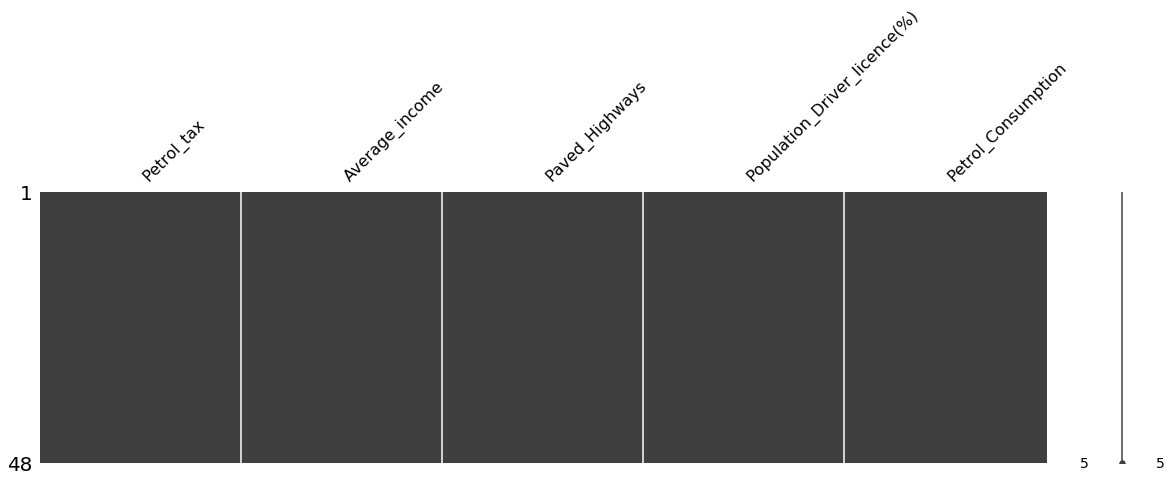

In [19]:
#Check missing values using missingno plot
mnso.matrix(df, figsize=(20,5))

### Check Data is Balanced or Imbalanced

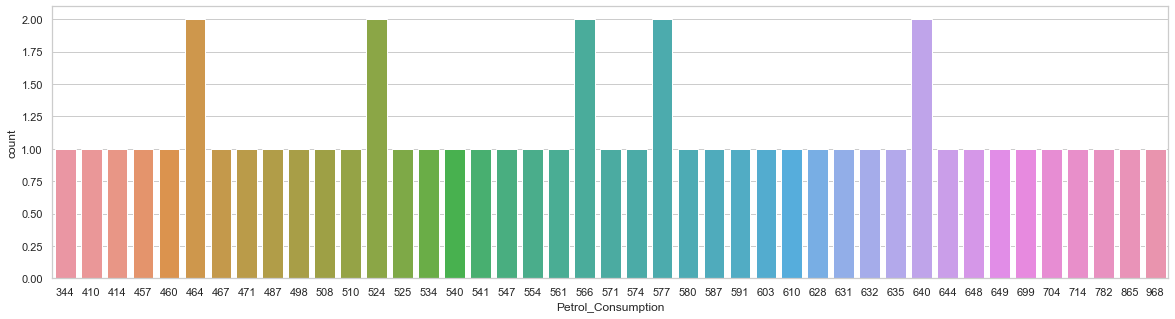

In [64]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
sns.countplot('Petrol_Consumption', data=df)

In [35]:
df.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


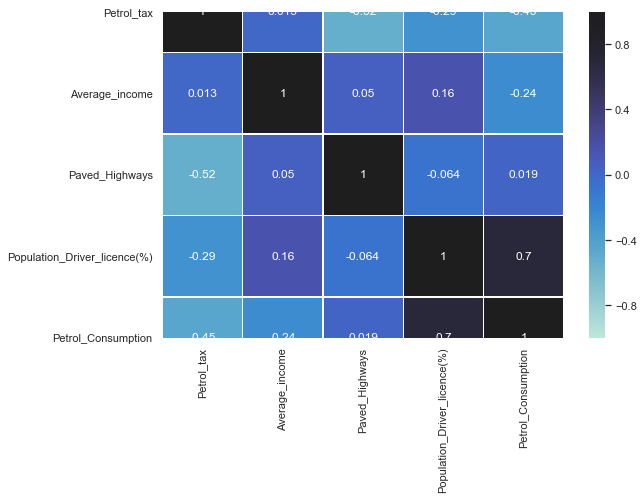

In [61]:
sns.set()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=True, linewidths=.5)

In [68]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

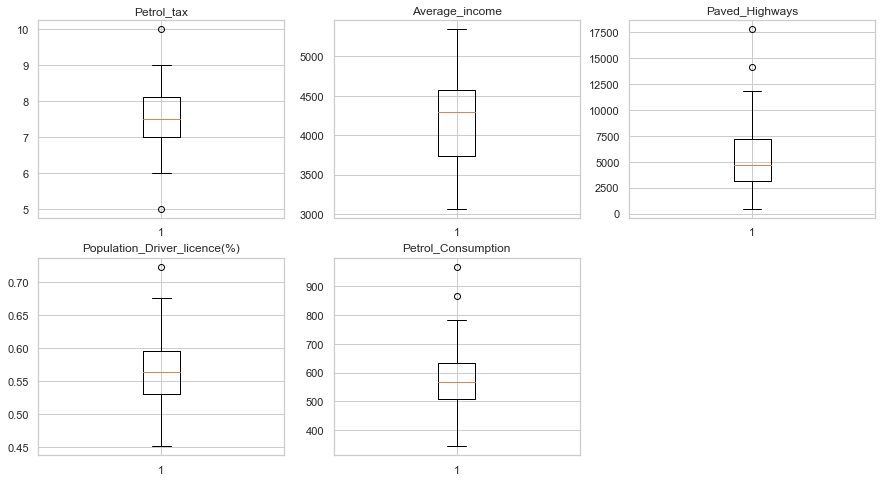

In [75]:
#Check Outliers using boxplot

plt.figure(figsize=(15,8))
count = 1
no_of_cols = len(df.columns)
total_cols = 3
total_rows = no_of_cols//total_cols + 1
for col in df:
    plt.subplot(total_rows,total_cols,count)
    plt.boxplot(df[col])
    plt.title(col)
    count +=1
plt.show()

In [93]:
df1 = df.copy()
print(df1.shape)
print(df.shape)

(48, 5)
(48, 5)


In [95]:
# Remove Outliers using IQR method

q1 = df1['Petrol_tax'].quantile(0.25)
q3 = df1['Petrol_tax'].quantile(0.75)

IQR = q3 - q1

l1 = q1 - 1.5*IQR
u1 = q3 + 1.5*IQR

df1 = df1[~((df1['Petrol_tax'] < l1) | (df1['Petrol_tax'] > u1))]
df1.shape

(46, 5)

In [96]:
q1 = df1['Paved_Highways'].quantile(0.25)
q3 = df1['Paved_Highways'].quantile(0.75)

iqr = q3 - q1

l1 = q1 - 1.5*iqr
u1 = q3 + 1.5*iqr

df1 = df1[~((df1['Paved_Highways'] < l1) | (df1['Paved_Highways'] > u1))]

df1.shape

(46, 5)

In [97]:
q1 = df1['Population_Driver_licence(%)'].quantile(0.25)
q2 = df1['Population_Driver_licence(%)'].quantile(0.75)

iqr = q3 - q1

l1 = q1 - 1.5*iqr
u1 = q3 + 1.5*iqr

df1 = df1[~((df1['Population_Driver_licence(%)'] < l1) | (df1['Population_Driver_licence(%)'] > u1))]

df1.shape

(46, 5)

In [98]:
q1 = df1['Petrol_Consumption'].quantile(0.25)
q3 = df1['Petrol_Consumption'].quantile(0.75)

iqr = q3 - q1

l1 = q1 - 1.5*iqr
u1 = q3 + 1.5*iqr

df1 = df1[~((df1['Petrol_Consumption'] < l1) | (df1['Petrol_Consumption'] >u1))]

df1.shape

(44, 5)

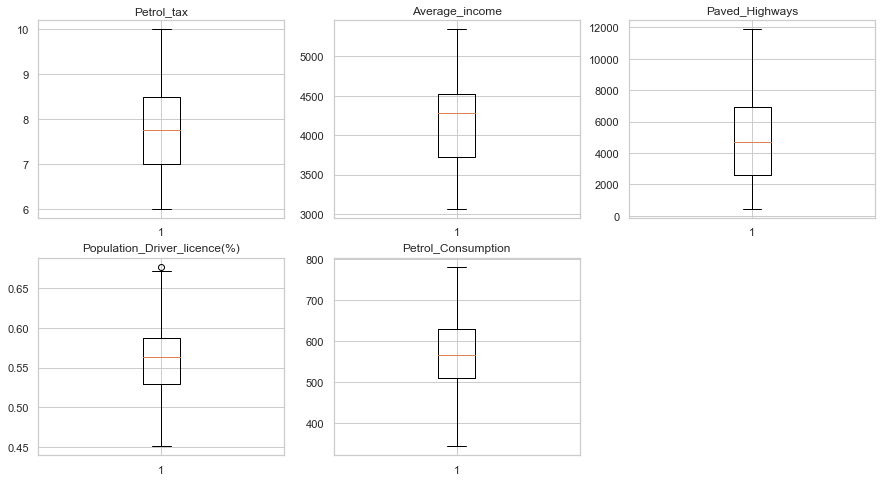

In [99]:
#Checking for Outliers again
plt.figure(figsize=(15,8))

count = 1
no_of_cols = len(df1.columns)
total_cols = 3
total_rows = no_of_cols//total_cols + 1

for col in df1:
    plt.subplot(total_rows, total_cols, count)
    plt.boxplot(df1[col])
    plt.title(col)
    count +=1
plt.show()

In [100]:
df.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


In [101]:
df1.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.020526,-0.432977,-0.283654,-0.476168
Average_income,0.020526,1.000000,-0.015085,0.148631,-0.381448
Paved_Highways,-0.432977,-0.015085,1.000000,-0.019269,0.071756
Population_Driver_licence(%),-0.283654,0.148631,-0.019269,1.000000,0.597964
Petrol_Consumption,-0.476168,-0.381448,0.071756,0.597964,1.000000


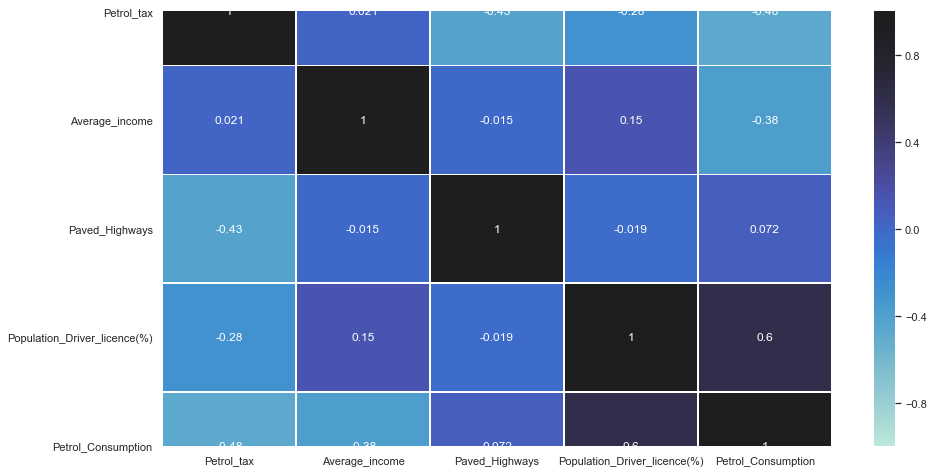

In [104]:
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(), annot=True, vmin = -1, vmax=1, linewidth=0.5, center = True)

In [110]:
y = df1.Petrol_Consumption
X = df1.drop(['Petrol_Consumption'], axis=1)

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [122]:
regressor = LinearRegression()

In [123]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
ypredict = regressor.predict(X_test)

In [125]:
r2_score(y_test, ypredict)

0.5482140911513227